In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Insert local path to MAVE-NN at beginning of Python's path
import sys
sys.path.insert(0, '/Users/annzhu/Desktop/phillipslab/mavenn')

#Load mavenn
import mavenn

In [3]:
mavenn.run_tests()

Testing Model() parameter regression_type ...
Test # 0: Expected error: regression_type = polynomial;must be "MPA", or "GE"
Test # 1: Expected success.
Tests passed: 2. Tests failed: 0.

Testing Model() parameter ge_nonlinearity_monotonic ...
Test # 2: Expected error: ge_nonlinearity_monotonic must be a boolean
Test # 3: Expected error: ge_nonlinearity_monotonic must be a boolean
Test # 4: Expected success.
Test # 5: Expected success.
Tests passed: 6. Tests failed: 0.

Testing Model() parameter ge_nonlinearity_hidden_nodes ...
Test # 6: Expected error: ge_nonlinearity_hidden_nodes must be an integer.
Test # 7: Expected error: ge_nonlinearity_hidden_nodes must be greater than 0.
Test # 8: Expected error: ge_nonlinearity_hidden_nodes must be greater than 0.
Test # 9: Expected success.
Test # 10: Expected success.
Test # 11: Expected success.
Tests passed: 12. Tests failed: 0.

Testing Model() parameter gpmap_type ...
Test # 12: Expected error: model_type = standard; must be in ['additive

/Users/annzhu/Desktop/phillipslab/mavenn/mavenn/tests/specific_tests.py:40: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series([])


Testing validate_alphabet() parameter alphabet ...
Test # 68: Expected error: Unknown alphabet=xna. Must be one of [dict_keys(['dna', 'rna', 'protein', 'protein*'])].
Test # 69: Expected error: Unknown alphabet=protein-. Must be one of [dict_keys(['dna', 'rna', 'protein', 'protein*'])].
Test # 70: Expected error: Entries of alphabet are not unique.
Test # 71: Expected error: len(alphabet)=0; must be >= 1.
Test # 72: Expected error: type(alphabet)=<class 'dict'> is invalid. Must be one of (<class 'str'>, <class 'list'>, <class 'set'>, <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>).
Test # 73: Expected error: Alphabet must be 1D. alphabet.shape=(2, 2)
Test # 74: Expected error: Alphabet contains non-string characters.
Test # 75: Expected error: len(alphabet)=0; must be >= 1.
Test # 76: Expected success.
Test # 77: Expected success.
Test # 78: Expected success.
Test # 79: Expected success.
Test # 80: Expected success.
Test # 81: Expected success.
Test # 82: Expected success

Training time: 2.2 seconds
Testing model inference with: 
gpmap_type='pairwise', 
dataset='gb1', 
noise_model='Cauchy'
Testing test_for_nan_in_model_methods() parameter seqs ...
Test # 128: Expected error: x contain the following characters not in alphabet:{'n', 'a'}
Test # 129: Expected success.
Tests passed: 130. Tests failed: 0.

Training time: 5.7 seconds
Testing model inference with: 
gpmap_type='pairwise', 
dataset='gb1', 
noise_model='SkewedT'
Testing test_for_nan_in_model_methods() parameter seqs ...
Test # 130: Expected error: x contain the following characters not in alphabet:{'n', 'a'}
Test # 131: Expected success.
Tests passed: 132. Tests failed: 0.

L=75, Y=10
Training time: 1.5 seconds
gpmap_type = additive, dataset = sortseq
Testing model inference with: 
gpmap_type='additive', 
dataset="sortseq"
Testing test_for_nan_in_model_methods() parameter seqs ...
Test # 132: Expected error: x contain the following characters not in alphabet:{'n', 'a'}
Test # 133: Expected success

In [4]:
# Choose dataset
data_name = 'sortseq'

print(f"Loading dataset '{data_name}' ")

# Load datset
data_df = mavenn.load_example_dataset(data_name)

# Get and report sequence length
L = len(data_df.loc[0, 'x'])
print(f'Sequence length: {L:d} amino acids')

# Preview dataset
data_df

Loading dataset 'sortseq' 
Sequence length: 75 amino acids


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,0,1,0,0,0,0,0,0,0,0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...
1,test,0,0,0,0,0,0,0,0,1,0,AAAAAATCTGAGTTAGCTTACTCATTAGGCACCCCAGGCTTGACAC...
2,test,0,0,0,0,0,0,1,0,0,0,AAAAAATCTGAGTTTGCTCACTCTATCGGCACCCCAGTCTTTACAC...
3,training,0,0,0,0,0,0,0,0,0,1,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...
4,training,0,0,0,0,0,0,0,0,0,1,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...
...,...,...,...,...,...,...,...,...,...,...,...,...
50513,validation,0,0,0,1,0,0,0,0,0,0,TTTTGCAGAGTGTCAGCCCACTCATTACGCACCGCAGCCGTTACAC...
50514,test,0,0,0,0,0,0,0,0,1,0,TTTTTATGTGAGTTAGCTCACTCATTCGGCACCCTAGGCTTTACAC...
50515,training,0,0,0,1,0,0,0,0,0,0,TTTTTATGTGAGTTTGCTCACTCATGTGGCACCTAAGGCTTTACGC...
50516,training,1,0,0,0,0,0,0,0,0,0,TTTTTATGTGGGTTAGGTCGCGCATTAGGCACCGCAGGCTTTACCC...


In [5]:
# Split dataset
trainval_df, test_df = mavenn.split_dataset(data_df)

# Show dataset sizes
print(f'Train + val set size : {len(trainval_df):6,d} observations')
print(f'Test set size        : {len(test_df):6,d} observations')

# Preview trainval_df
trainval_df

Training set   :   30,516 observations (  60.41%)
Validation set :   10,067 observations (  19.93%)
Test set       :    9,935 observations (  19.67%)
-------------------------------------------------
Total dataset  :   50,518 observations ( 100.00%)

Train + val set size : 40,583 observations
Test set size        :  9,935 observations


,validation,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,False,0,1,0,0,0,0,0,0,0,0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...
1,False,0,0,0,0,0,0,0,0,0,1,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...
2,False,0,0,0,0,0,0,0,0,0,1,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...
3,False,0,1,0,0,0,0,0,0,0,0,AAAAAATGTCAGTTAGCTGACTCATTAGGCACCCCTGGCTTTACGT...
4,True,0,0,0,0,0,0,1,0,0,0,AAAAAATGTGAGAAAGCTCACTCCTTTGGCACCGCAGGCTTTACAC...
...,...,...,...,...,...,...,...,...,...,...,...,...
40578,True,0,1,0,0,0,0,0,0,0,0,TTTTGATGTGGGTTTGCTCTCTCTTCAGGCACCCCACGCTTTACGC...
40579,True,0,0,0,1,0,0,0,0,0,0,TTTTGCAGAGTGTCAGCCCACTCATTACGCACCGCAGCCGTTACAC...
40580,False,0,0,0,1,0,0,0,0,0,0,TTTTTATGTGAGTTTGCTCACTCATGTGGCACCTAAGGCTTTACGC...
40581,False,1,0,0,0,0,0,0,0,0,0,TTTTTATGTGGGTTAGGTCGCGCATTAGGCACCGCAGGCTTTACCC...


In [6]:
# Get the length of the sequence
L = len(data_df['x'][0])
# Get the column index for the counts
y_cols = trainval_df.columns[1:-1]
# Get the number of count columns
len_y_cols = len(y_cols)

In [7]:
from mavenn.src.layers.gpmap import GPMapLayer

# Tensorflow imports
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras.initializers import Constant

class ThermodynamicLayer(GPMapLayer):
    """
    Represents a four-stage thermodynamic model
    containing the states:
    1. free DNA
    2. CPR-DNA binding
    3. RNAP-DNA binding
    4. CPR and RNAP both bounded to DNA and interact
    """

    def __init__(self,
                 tf_start,
                 tf_end,
                 rnap_start,
                 rnap_end,
                 *args, **kwargs):
        """Construct layer instance."""

        # Call superclass
        super().__init__(*args, **kwargs)

        # set attributes
        self.tf_start = tf_start            # transcription factor starting position
        self.tf_end = tf_end                 # transcription factor ending position
        self.L_tf = tf_end - tf_start        # length of transcription factor
        self.rnap_start = rnap_start         # RNAP starting position
        self.rnap_end = rnap_end             # RNAP ending position
        self.L_rnap = rnap_end - rnap_start  # length of RNAP

        # define bias/chemical potential weight for TF/CRP energy
        self.theta_tf_0 = self.add_weight(name='theta_tf_0',
                                          shape=(1,),
                                          initializer=Constant(1.),
                                          trainable=True,
                                          regularizer=self.regularizer)

        # define bias/chemical potential weight for rnap energy
        self.theta_rnap_0 = self.add_weight(name='theta_rnap_0',
                                            shape=(1,),
                                            initializer=Constant(1.),
                                            trainable=True,
                                            regularizer=self.regularizer)

        # initialize the theta_tf
        theta_tf_shape = (1, self.L_tf, self.C)
        theta_tf_init = np.random.randn(*theta_tf_shape)/np.sqrt(self.L_tf)

        # define the weights of the layer corresponds to theta_tf
        self.theta_tf = self.add_weight(name='theta_tf',
                                        shape=theta_tf_shape,
                                        initializer=Constant(theta_tf_init),
                                        trainable=True,
                                        regularizer=self.regularizer)

        # define theta_rnap parameters
        theta_rnap_shape = (1, self.L_rnap, self.C)
        theta_rnap_init = np.random.randn(*theta_rnap_shape)/np.sqrt(self.L_rnap)

        # define the weights of the layer corresponds to theta_rnap
        self.theta_rnap = self.add_weight(name='theta_rnap',
                                          shape=theta_rnap_shape,
                                          initializer=Constant(theta_rnap_init),
                                          trainable=True,
                                          regularizer=self.regularizer)

        # define trainable real number G_I, representing interaction Gibbs energy
        self.theta_dG_I = self.add_weight(name='theta_dG_I',
                                   shape=(1,),
                                   initializer=Constant(-4),
                                   trainable=True,
                                   regularizer=self.regularizer)


    def call(self, x):
        """Process layer input and return output.

        x: (tensor)
            Input tensor that represents one-hot encoded
            sequence values.
        """

        # 1kT = 0.616 kcal/mol at body temperature
        kT = 0.616

        # extract locations of binding sites from entire lac-promoter sequence.
        # for transcription factor and rnap
        x_tf = x[:, self.C * self.tf_start:self.C * self.tf_end]
        x_rnap = x[:, self.C * self.rnap_start: self.C * self.rnap_end]

        # reshape according to tf and rnap lengths.
        x_tf = tf.reshape(x_tf, [-1, self.L_tf, self.C])
        x_rnap = tf.reshape(x_rnap, [-1, self.L_rnap, self.C])

        # compute delta G for crp binding
        G_C = self.theta_tf_0 + \
            tf.reshape(K.sum(self.theta_tf * x_tf, axis=[1, 2]),
                       shape=[-1, 1])

        # compute delta G for rnap binding
        G_R = self.theta_rnap_0 + \
            tf.reshape(K.sum(self.theta_rnap * x_rnap, axis=[1, 2]),
                       shape=[-1, 1])

        G_I = self.theta_dG_I

        # compute phi
        numerator_of_rate = K.exp(-G_R/kT) + K.exp(-(G_C+G_R+G_I)/kT)
        denom_of_rate = 1.0 + K.exp(-G_C/kT) + K.exp(-G_R/kT) + K.exp(-(G_C+G_R+G_I)/kT)
        phi = numerator_of_rate/denom_of_rate

        return phi

In [8]:
# define custom gp_map parameters dictionary
gpmap_kwargs = {'tf_start': 1,  # starting position of the CRP
                'tf_end': 27,  # ending position of the CRP
                'rnap_start': 34,  # starting position of the RNAP
                'rnap_end': 75,   # ending position of the RNAP
                'L': L,
                'C': 4,
                'theta_regularization': 0.1}

# Create model
model = mavenn.Model(L=L,
                     Y=len_y_cols,
                     alphabet='dna',
                     regression_type='MPA',
                     gpmap_type='custom',
                     gpmap_kwargs=gpmap_kwargs,
                     custom_gpmap=ThermodynamicLayer);

# Set training data
model.set_data(x=trainval_df['x'],
               y=trainval_df[y_cols],
               validation_flags=trainval_df['validation'],
               shuffle=True);

# Fit model to data
model.fit(learning_rate=5e-4,
          epochs=2000,
          batch_size=100,
          early_stopping=True,
          early_stopping_patience=25,
          linear_initialization=False,
          verbose=False);

N = 40,583 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.384 sec.
Training time: 660.1 seconds


In [9]:
model.save('sortseq_thermodynamic_mpa')

Model saved to these files:
	sortseq_thermodynamic_mpa.pickle
	sortseq_thermodynamic_mpa.h5


In [10]:
# Compute predictive information on test data
I_pred, dI_pred = model.I_predictive(x=test_df['x'], y=test_df[y_cols])
print(f'test_I_pred: {I_pred:.3f} +- {dI_pred:.3f} bits')

test_I_pred: 0.688 +- 0.017 bits


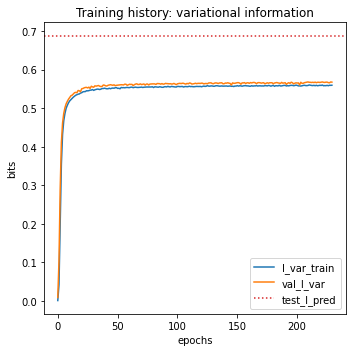

In [11]:
# Create figure and axes for plotting
fig, ax = plt.subplots(1, 1, figsize=[5, 5])

# Plot I_var_train, the variational information on training data as a function of epoch
ax.plot(model.history['I_var'], label=r'I_var_train')

# Plot I_var_val, the variational information on validation data as a function of epoch
ax.plot(model.history['val_I_var'], label=r'val_I_var')

# Show I_pred_test, the predictive information of the final model on test data
ax.axhline(I_pred, color='C3', linestyle=':', label=r'test_I_pred')

# Style plot
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('Training history: variational information')
ax.legend()

plt.tight_layout()

In [12]:
# Get the trained model parameters
# Retrieve G-P map parameter dict and view dict keys
param_dict = model.layer_gpmap.get_params()
param_dict.keys()

dict_keys(['theta_tf_0', 'theta_rnap_0', 'theta_tf', 'theta_rnap', 'theta_dG_I'])

In [13]:
delta_G_I = param_dict['theta_dG_I']  # Gibbs energy of Interaction (scalar)
print(f'CRP-RNAP interaction energy = {delta_G_I*0.62:.3f} k_cal/mol')

CRP-RNAP interaction energy = -1.714 k_cal/mol


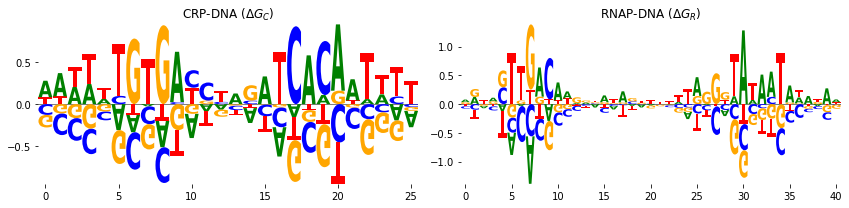

In [14]:
# import logomaker
import logomaker

# Get the \Delta G_C trained values (theta_tf)
crp_weights = param_dict['theta_tf']
# Get the \Delta G_R trained values (theta_rnap)
rnap_weights = param_dict['theta_rnap']
# Convert them to pandas dataframe
crp_df = pd.DataFrame(crp_weights, columns=model.alphabet)
rnap_df = pd.DataFrame(rnap_weights, columns=model.alphabet)


# plot logos
fig, axs = plt.subplots(1, 2, figsize=[12, 3])

# sequence logo for the CRP-DNA binding energy matrix
logo = logomaker.Logo(crp_df,  ax=axs[0], center_values=True)
axs[0].set_title('CRP-DNA ($\Delta G_C$)')
logo.style_spines(visible=False)


# sequence logo for the RNAP-DNA binding energy matrix
logo = logomaker.Logo(rnap_df, ax=axs[1], center_values=True)
axs[1].set_title('RNAP-DNA ($\Delta G_R$)')
logo.style_spines(visible=False)

plt.tight_layout()

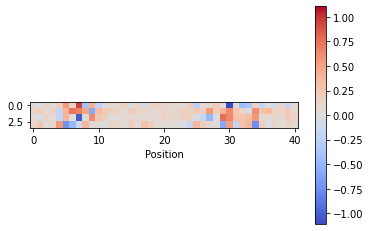

In [15]:
maximum = np.max(np.abs(rnap_weights))
    #now plot using matplotlib
plt.imshow(
    -rnap_weights.T,
    #aspect='auto', 
    interpolation='nearest',
    cmap='coolwarm',
    vmin=-maximum,
    vmax=maximum
)
plt.xlabel('Position')

plt.colorbar()